In [29]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
from datetime import timedelta
import plotly.graph_objects as go
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '${:,.2f}'.format

In [30]:
today=datetime.today().strftime('%Y-%m-%d') 
start_date = '2016-01-01'
df = yf.download('BTC-USD', start_date, today)

[*********************100%%**********************]  1 of 1 completed


In [31]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,$430.72,$436.25,$427.52,$434.33,$434.33,36278900
2016-01-02,$434.62,$436.06,$431.87,$433.44,$433.44,30096600
2016-01-03,$433.58,$433.74,$424.71,$430.01,$430.01,39633800
2016-01-04,$430.06,$434.52,$429.08,$433.09,$433.09,38477500
2016-01-05,$433.07,$434.18,$429.68,$431.96,$431.96,34522600
...,...,...,...,...,...,...
2023-11-05,"$35,090.01","$35,340.34","$34,594.24","$35,049.36","$35,049.36",12412743996
2023-11-06,"$35,044.79","$35,286.03","$34,765.36","$35,037.37","$35,037.37",12693436420
2023-11-07,"$35,047.79","$35,892.42","$34,545.82","$35,443.56","$35,443.56",18834737789


In [32]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [33]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,$430.72,$436.25,$427.52,$434.33,$434.33,36278900
2016-01-02,$434.62,$436.06,$431.87,$433.44,$433.44,30096600
2016-01-03,$433.58,$433.74,$424.71,$430.01,$430.01,39633800
2016-01-04,$430.06,$434.52,$429.08,$433.09,$433.09,38477500
2016-01-05,$433.07,$434.18,$429.68,$431.96,$431.96,34522600


In [34]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,"$2,870.00","$2,870.00","$2,870.00","$2,870.00","$2,870.00","$2,870.00"
mean,"$16,450.12","$16,839.41","$16,029.14","$16,461.19","$16,461.19","$19,168,087,374.89"
std,"$16,145.30","$16,541.47","$15,696.21","$16,143.61","$16,143.61","$19,434,299,526.55"
min,$365.07,$374.95,$354.91,$364.33,$364.33,"$28,514,000.00"
25%,"$4,052.31","$4,115.34","$3,972.01","$4,066.18","$4,066.18","$3,674,422,500.00"
50%,"$9,518.59","$9,690.55","$9,305.47","$9,521.06","$9,521.06","$15,653,982,072.00"
75%,"$26,628.61","$27,053.17","$26,322.63","$26,705.61","$26,705.61","$29,906,093,638.50"
max,"$67,549.73","$68,789.62","$66,382.06","$67,566.83","$67,566.83","$350,967,941,479.00"


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2870 entries, 2016-01-01 to 2023-11-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2870 non-null   float64
 1   High       2870 non-null   float64
 2   Low        2870 non-null   float64
 3   Close      2870 non-null   float64
 4   Adj Close  2870 non-null   float64
 5   Volume     2870 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 157.0 KB


In [36]:
df.isnull().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [37]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [38]:
df.reset_index(inplace=True)
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [39]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,$430.72,$436.25,$427.52,$434.33,$434.33,36278900
1,2016-01-02,$434.62,$436.06,$431.87,$433.44,$433.44,30096600
2,2016-01-03,$433.58,$433.74,$424.71,$430.01,$430.01,39633800
3,2016-01-04,$430.06,$434.52,$429.08,$433.09,$433.09,38477500
4,2016-01-05,$433.07,$434.18,$429.68,$431.96,$431.96,34522600


In [40]:
df1=df[['Date','Open']]
df1.head()

,Date,Open
0,2016-01-01,$430.72
1,2016-01-02,$434.62
2,2016-01-03,$433.58
3,2016-01-04,$430.06
4,2016-01-05,$433.07


In [41]:
newn={
    "Date":"ds",
    "Open":"y",
}
df1.rename(columns=newn,inplace=True)
df1.head()

,ds,y
0,2016-01-01,$430.72
1,2016-01-02,$434.62
2,2016-01-03,$433.58
3,2016-01-04,$430.06
4,2016-01-05,$433.07


In [42]:
import plotly.graph_objects as go

x = df1["ds"]
y = df1["y"]

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y))

# Set title
fig.update_layout(
    title_text="Time series plot of Bitcoin Open Price"
)

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list(
                [
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all"),
                ]
            ),
            visible=True
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

# Show the plot
fig.show()


In [43]:
import plotly.graph_objects as go

x = df["Date"]
y = df["Volume"]

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y))

# Set title
fig.update_layout(
    title_text="Time series plot of Bitcoin Volume"
)

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list(
                [
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all"),
                ]
            ),
            visible=True
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

# Show the plot
fig.show()


In [44]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)


#BTC Volume vs USD visualization
trace = go.Scattergl(
    y = df['Volume'].astype(float),
    x = df['Close'].astype(float),
    mode = 'markers',
    marker = dict(
        color = '#FFBAD2',
        line = dict(width = 1)
    )
)
layout = go.Layout(
    title='BTC Volume v/s USD',
    xaxis=dict(
        title='Weighted Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Volume BTC',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )))
data = [trace]
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig, filename='compare_webgl')

In [45]:

m = Prophet(
    seasonality_mode="multiplicative",
)

m.fit(df1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
future=m.make_future_dataframe(periods=365)
future.tail()

,ds
3230,2024-11-04
3231,2024-11-05
3232,2024-11-06
3233,2024-11-07
3234,2024-11-08


In [47]:
forecast=m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2016-01-01,$6.26,"$-4,839.80","$4,936.49",$6.26,$6.26,$-0.00,$-0.00,$-0.00,$-0.00,$-0.00,$-0.00,$-0.00,$-0.00,$-0.00,$0.00,$0.00,$0.00,$6.24
1,2016-01-02,$8.99,"$-5,132.98","$5,001.21",$8.99,$8.99,$0.00,$0.00,$0.00,$-0.00,$-0.00,$-0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$9.01
2,2016-01-03,$11.72,"$-4,522.74","$5,164.48",$11.72,$11.72,$0.01,$0.01,$0.01,$-0.00,$-0.00,$-0.00,$0.01,$0.01,$0.01,$0.00,$0.00,$0.00,$11.81
3,2016-01-04,$14.45,"$-4,978.38","$4,731.14",$14.45,$14.45,$0.01,$0.01,$0.01,$0.00,$0.00,$0.00,$0.01,$0.01,$0.01,$0.00,$0.00,$0.00,$14.64
4,2016-01-05,$17.18,"$-4,526.30","$4,779.49",$17.18,$17.18,$0.02,$0.02,$0.02,$0.00,$0.00,$0.00,$0.02,$0.02,$0.02,$0.00,$0.00,$0.00,$17.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,2024-11-04,"$24,437.69","$7,276.25","$45,246.78","$6,259.23","$41,896.06",$0.09,$0.09,$0.09,$0.00,$0.00,$0.00,$0.09,$0.09,$0.09,$0.00,$0.00,$0.00,"$26,543.50"
3231,2024-11-05,"$24,435.23","$5,782.69","$46,666.45","$6,202.57","$41,955.09",$0.08,$0.08,$0.08,$0.00,$0.00,$0.00,$0.08,$0.08,$0.08,$0.00,$0.00,$0.00,"$26,478.18"
3232,2024-11-06,"$24,432.77","$6,216.89","$45,295.68","$6,145.91","$42,014.12",$0.08,$0.08,$0.08,$0.00,$0.00,$0.00,$0.08,$0.08,$0.08,$0.00,$0.00,$0.00,"$26,391.42"
3233,2024-11-07,"$24,430.31","$6,998.47","$46,117.41","$6,089.25","$42,070.91",$0.08,$0.08,$0.08,$0.00,$0.00,$0.00,$0.08,$0.08,$0.08,$0.00,$0.00,$0.00,"$26,361.85"


In [48]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3230,2024-11-04,"$26,543.50","$7,276.25","$45,246.78"
3231,2024-11-05,"$26,478.18","$5,782.69","$46,666.45"
3232,2024-11-06,"$26,391.42","$6,216.89","$45,295.68"
3233,2024-11-07,"$26,361.85","$6,998.47","$46,117.41"
3234,2024-11-08,"$26,149.90","$6,528.67","$46,197.83"


In [49]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-01,$6.24,"$-4,839.80","$4,936.49"
1,2016-01-02,$9.01,"$-5,132.98","$5,001.21"
2,2016-01-03,$11.81,"$-4,522.74","$5,164.48"
3,2016-01-04,$14.64,"$-4,978.38","$4,731.14"
4,2016-01-05,$17.46,"$-4,526.30","$4,779.49"


In [50]:
next_day=(datetime.today()+timedelta(days=1)).strftime('%Y-%m-%d')
forecast[forecast['ds']==next_day]['yhat'].item()

26894.970744877926

In [51]:
plot_plotly(m,forecast)

In [52]:
plot_components_plotly(m,forecast)

In [53]:
import pickle
pickle.dump(m,open('fbcrypto.pkl','wb'))

INFO:fbprophet:Making 12 forecasts with cutoffs between 2017-06-08 00:00:00 and 2022-11-09 00:00:00


  0%|          | 0/12 [00:00<?, ?it/s]

  horizon            mse      rmse       mae  mape  mdape  coverage
0 37 days $30,460,837.99 $5,519.13 $4,190.97 $0.36  $0.24     $0.15
1 38 days $31,859,113.54 $5,644.39 $4,259.57 $0.37  $0.25     $0.15
2 39 days $33,694,115.73 $5,804.66 $4,340.80 $0.37  $0.25     $0.15
3 40 days $35,482,365.48 $5,956.71 $4,417.51 $0.38  $0.26     $0.15
4 41 days $37,429,333.02 $6,117.95 $4,489.15 $0.38  $0.27     $0.16


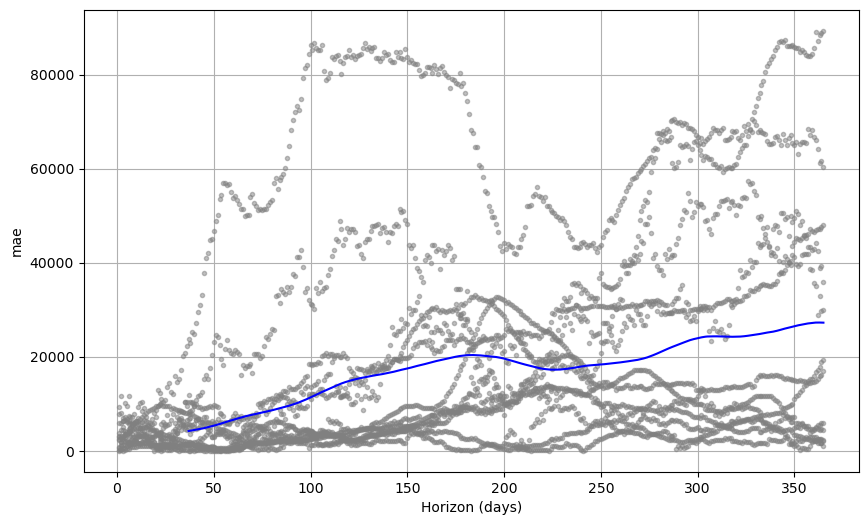

In [54]:
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.diagnostics import cross_validation

# Assuming 'model' is your fitted Prophet model
df_cv = cross_validation(m, initial='365 days', period='180 days', horizon='365 days')

# Compute performance metrics
df_p = performance_metrics(df_cv)
print(df_p.head())

# Visualize performance metrics
fig = plot_cross_validation_metric(df_cv, metric='mae')


In [55]:
from datetime import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming 'data_test' is your DataFrame containing true values and 'forecast' is the DataFrame with predicted values
y_true = df1['y']
forecast_before_nov_9 = forecast[forecast['ds'] <= datetime(2023, 11, 9)]

# Extract yhat column from the filtered DataFrame
y_pred = forecast_before_nov_9['yhat']

# Mean Squared Error (MSE)
mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R2)
r2 = r2_score(y_true=y_true, y_pred=y_pred)
print(f"R-squared (R2): {r2}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 14187191.901268193
Mean Absolute Error (MAE): 2605.9734316735935
R-squared (R2): 0.9455552766056716
Root Mean Squared Error (RMSE): 3766.588894645684
